In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9988 non-null   object 
 6   Age              9976 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [52]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [53]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [54]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [55]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [56]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [57]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [58]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Exited'])
y=df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [60]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [61]:
model=Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(loss='binary_crossentropy',optimizer='Adam')  

In [64]:
model.fit(X_train_scaled,y_train,epochs=25)

Epoch 1/25


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7834
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6126
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5314
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4938
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4755
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4648
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4571
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4509
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4458
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4416
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4380
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4352
Epoch 13/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4327
Epoch 14/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4306
Epoch 15/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4284


In [66]:
model.layers[0].get_weights()

[array([[-0.04777013,  0.0572331 , -0.18581997],
        [-0.02539568, -1.1910713 ,  3.222699  ],
        [-0.06138835,  0.15007314,  0.0364094 ],
        [-0.71958315, -0.3937287 ,  0.17465855],
        [-2.7624242 , -0.38498414,  0.19732523],
        [ 0.02374673, -0.08810531, -0.10238516],
        [-0.5905271 ,  1.150293  ,  0.03356914],
        [ 0.01852764, -0.08352012, -0.1589819 ],
        [ 0.59288776, -0.77061325,  0.1996572 ],
        [-0.10063824, -0.07176793,  0.05594198],
        [-0.0816346 ,  0.5372081 , -0.31763175]], dtype=float32),
 array([-1.2865399,  1.2046062, -0.5966086], dtype=float32)]

In [70]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [71]:
y_pred=np.where(y_log>0.5,1,0)

In [72]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8295

In [73]:
model2=Sequential()

model2.add(Dense(11,activation='relu',input_dim=11))
model2.add(Dense(11,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))


C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [83]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8591 - loss: 0.3505 - val_accuracy: 0.8562 - val_loss: 0.3497
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8597 - loss: 0.3504 - val_accuracy: 0.8556 - val_loss: 0.3497
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8591 - loss: 0.3504 - val_accuracy: 0.8556 - val_loss: 0.3497
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8591 - loss: 0.3503 - val_accuracy: 0.8556 - val_loss: 0.3496
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8587 - loss: 0.3502 - val_accuracy: 0.8569 - val_loss: 0.3494
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8586 - loss: 0.3501 - val_accuracy: 0.8550 - val_loss: 0.3494
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8591 - loss: 0.3500 - val_accuracy: 0.8569 - val_loss: 0.3494
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8587 - loss: 0.3499 - val_accuracy: 0.8562

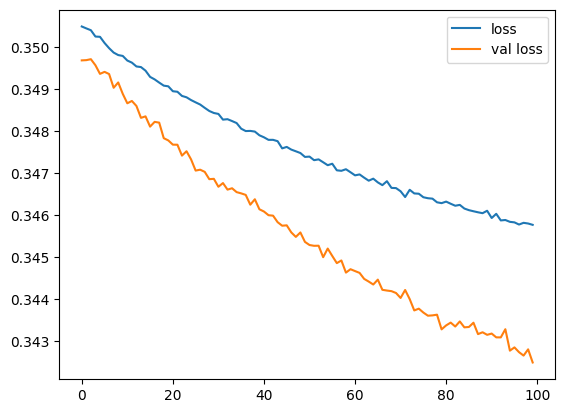

In [85]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()

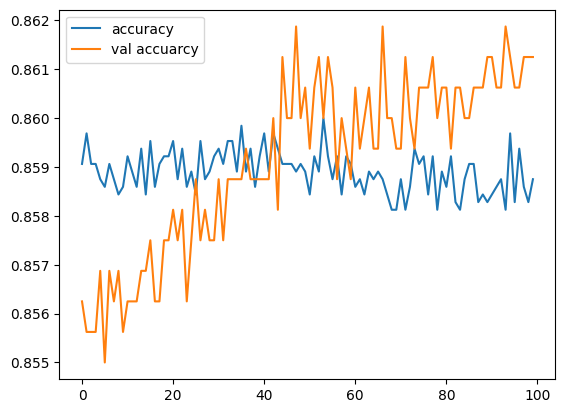

In [86]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val accuarcy')
plt.legend()
plt.show()

In [78]:
model2.layers[0].get_weights()

[array([[ 0.267453  , -0.21233806,  0.03769332, -0.33420074,  0.20905   ,
          0.23843873,  0.35919452, -0.02718067,  0.13539618, -0.13140726,
         -0.25369057],
        [ 0.4041866 , -0.29106587, -0.47631153, -0.07519448, -0.29538822,
         -0.30870384, -0.2972418 ,  0.15955698,  0.36152947,  0.21928895,
          0.44015282],
        [ 0.12000203, -0.49049598, -0.35447288,  0.5114836 , -0.04405764,
         -0.11985013, -0.2082184 ,  0.45850188, -0.1531547 , -0.25374722,
         -0.07126719],
        [-0.10623407, -0.21056253,  0.42864823,  0.05124009,  0.04167712,
         -0.41839507, -0.10752612, -0.00795507,  0.26977426,  0.12671065,
         -0.17743802],
        [-0.12493351,  0.064358  ,  0.38930917,  0.18268412,  0.04351997,
         -0.21910915,  0.1829279 , -0.35550442, -0.4491052 ,  0.0406971 ,
         -0.14432383],
        [ 0.27743202, -0.4063181 , -0.17459357,  0.08908993,  0.35876   ,
         -0.17890698, -0.24827552, -0.36150604, -0.0627009 ,  0.4077339

In [79]:
y_log=model2.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [80]:
y_pred=np.where(y_log>0.5,1,0)

In [82]:
accuracy_score(y_test,y_pred)

0.701